# Bootstrapping und Stichprobenverteilungen in Python

## 1. Einführung in Bootstrapping
Bootstrapping ist eine leistungsstarke statistische Methode, um die Stichprobenverteilung einer Statistik zu schätzen, indem man wiederholt Stichproben mit Zurücklegen aus den Originaldaten zieht. Es wird häufig verwendet, wenn die Annahmen traditioneller parametrischer Methoden schwer zu erfüllen sind oder die Stichprobengröße klein ist.

[Bootstrapping-Verfahren auf Wikipedia](https://de.wikipedia.org/wiki/Bootstrapping-Verfahren)


## 2. Theorie und statistische Prinzipien des Bootstrappings
Bootstrapping funktioniert, indem man wiederholt zufällig (mit Zurücklegen) aus dem Datensatz Stichproben zieht, um mehrere resampelte Datensätze zu erstellen. Anschließend können Statistiken wie Mittelwert, Varianz oder Konfidenzintervalle auf Basis dieser resampelten Datensätze berechnet werden.

In [1]:
import numpy as np

# Originaldatensatz (Größen in cm)
data = np.array([170, 165, 180, 175, 160, 155, 168])

# Bootstrapping-Funktion, um Resamples zu erstellen
def bootstrap(data, n_resamples):
    resamples = np.random.choice(data, size=(n_resamples, len(data)), replace=True)
    return resamples

# Erstelle 1000 bootstrapped Stichproben
boot_samples = bootstrap(data, 1000)

# Berechne den Mittelwert jeder Stichprobe
boot_means = np.mean(boot_samples, axis=1)

print("Bootstrap-Mittelwerte:", boot_means[:10])  # Zeige die ersten 10 Mittelwerte

Bootstrap-Mittelwerte: [165.42857143 165.         163.57142857 169.71428571 171.85714286
 167.85714286 170.14285714 172.57142857 166.57142857 165.        ]


## 3. Bootstrapping für diskrete und kontinuierliche Daten
Bootstrapping kann sowohl auf diskrete als auch auf kontinuierliche Daten angewendet werden. Hier ist ein Beispiel für beide Typen.

In [2]:
# Diskrete Daten (z.B. Anzahl defekter Artikel in Chargen)
discrete_data = np.array([2, 3, 1, 4, 0, 3, 2])

# Kontinuierliche Daten (Größen von Individuen in cm)
continuous_data = np.array([170.5, 165.2, 180.1, 175.8, 160.0, 155.3, 168.4])

# Wende Bootstrapping auf beide Datensätze an
boot_discrete = bootstrap(discrete_data, 1000)
boot_continuous = bootstrap(continuous_data, 1000)

# Berechne den Mittelwert jeder bootstrapped Stichprobe
discrete_means = np.mean(boot_discrete, axis=1)
continuous_means = np.mean(boot_continuous, axis=1)

print("Diskrete Daten bootstrapped Mittelwerte:", discrete_means[:5])
print("Kontinuierliche Daten bootstrapped Mittelwerte:", continuous_means[:5])

Diskrete Daten bootstrapped Mittelwerte: [1.85714286 2.85714286 2.28571429 2.         2.42857143]
Kontinuierliche Daten bootstrapped Mittelwerte: [165.18571429 167.54285714 172.02857143 159.92857143 166.24285714]


## 4. Wann ist Bootstrapping effektiv?
Bootstrapping ist besonders nützlich, wenn die Daten die Annahmen traditioneller parametrischer Tests nicht erfüllen, z.B. wenn die Daten verzerrt sind oder die Stichprobengröße klein ist.

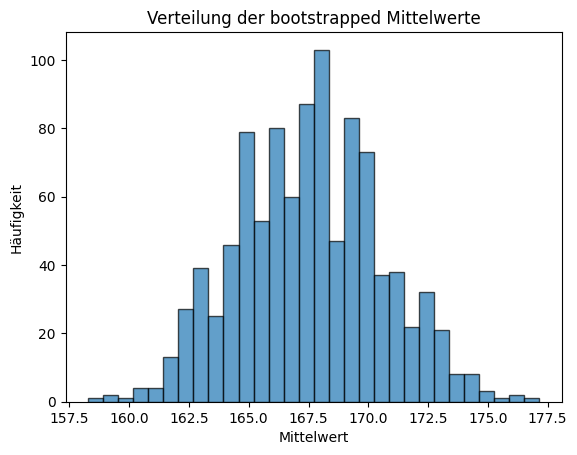

In [3]:
import matplotlib.pyplot as plt  # Richtiges Importieren von pyplot

# Plot der Verteilung der bootstrapped Mittelwerte
plt.hist(boot_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Verteilung der bootstrapped Mittelwerte')
plt.xlabel('Mittelwert')
plt.ylabel('Häufigkeit')
plt.show()

## 5. Analyse der bootstrapped Stichprobenverteilungen
Mit bootstrapped Stichproben können wir wichtige Statistiken wie Konfidenzintervalle schätzen. Hier ist ein Beispiel, wie man ein 95% Konfidenzintervall aus den bootstrapped Mittelwerten berechnet.

In [4]:
# Berechne das 95%-Konfidenzintervall aus den bootstrapped Mittelwerten
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)

print(f"95%-Konfidenzintervall für den Mittelwert: [{lower_bound}, {upper_bound}]")

95%-Konfidenzintervall für den Mittelwert: [162.13571428571427, 173.28571428571428]


## 6. Zuverlässigkeit und Validität von Bootstrapping
Obwohl Bootstrapping ein flexibles und leistungsstarkes Werkzeug ist, hat es auch Einschränkungen. Die Methode setzt voraus, dass die Stichprobendaten repräsentativ für die Population sind, was nicht immer der Fall sein muss. Sie kann auch bei Ausreißern Probleme haben.

In [5]:
# Variabilität der bootstrapped Mittelwerte
boot_variance = np.var(boot_means)
print("Varianz der bootstrapped Mittelwerte:", boot_variance)

Varianz der bootstrapped Mittelwerte: 8.898395734693876


## 7. Aufgabe zu Bootstrapping
### Datensatz:
datensatz = [12, 15, 12, 18, 22, 19, 22, 25, 17, 22, 30, 28, 24, 20, 26] 

- Ziehen Sie 1000 Bootstrap-Stichproben.
- Berechnen Sie den Mittelwert für jede Stichprobe.
- Erstellen Sie ein Histogramm der Stichprobenmittelwerte und interpretieren Sie die Verteilung.


[19.4        21.66666667 20.13333333 23.13333333 20.6        22.2
 19.86666667 19.8        21.13333333 22.2       ]


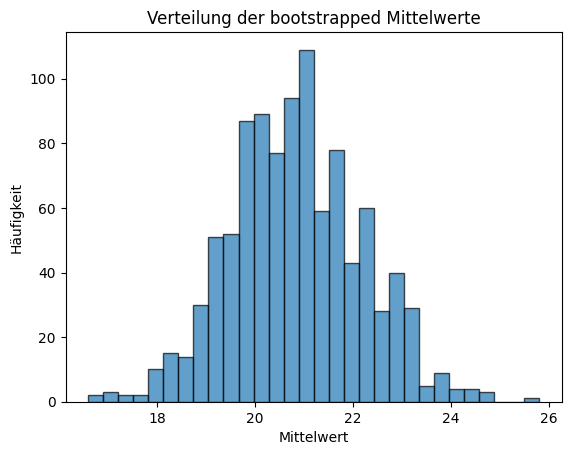

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap(data, n_resamples):
    resamples = np.random.choice(data, size=(n_resamples, len(data)), replace=True)
    return resamples

data = [12, 15, 12, 18, 22, 19, 22, 25, 17, 22, 30, 28, 24, 20, 26]

#data = np.array(data)
boot_samples = bootstrap(data, 1000)
boot_samples_mean = np.mean(boot_samples, axis=1)
print(boot_samples_mean[:10])

plt.hist(boot_samples_mean, bins=30, alpha=0.7, edgecolor='k')
plt.title('Verteilung der bootstrapped Mittelwerte')
plt.xlabel('Mittelwert')
plt.ylabel('Häufigkeit')
plt.show()